In [1]:
!{sys.executable} -m pip install -v "opencv-python==4.5.1.48"
!{sys.executable} -m pip install matplotlib

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.
'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


Load input images


In [2]:
import cv2 as cv

input_image_list = []
for i in range(1, 3):
    file_path = f'../data/img_{i}.jpg'
    image = cv.imread(file_path, cv.IMREAD_GRAYSCALE)
    input_image_list.append((image, file_path))

Straighten images and remove grid lines

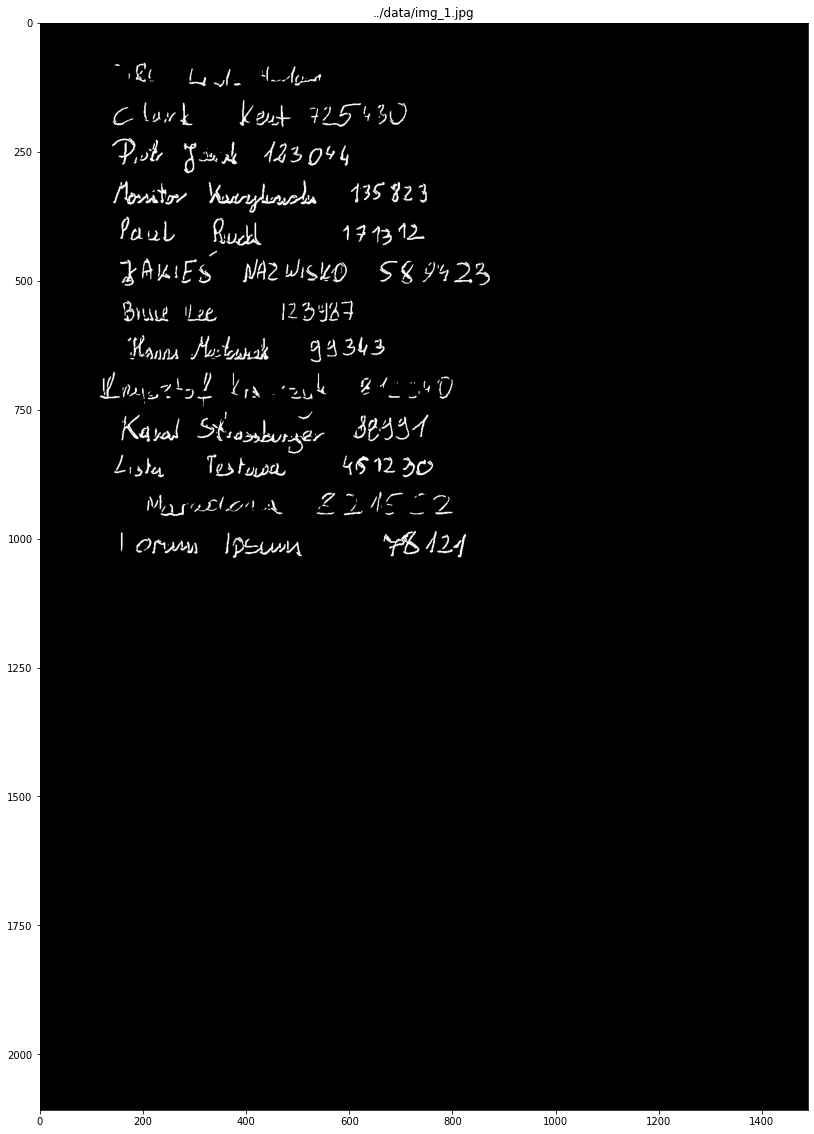

Took : 11.522s


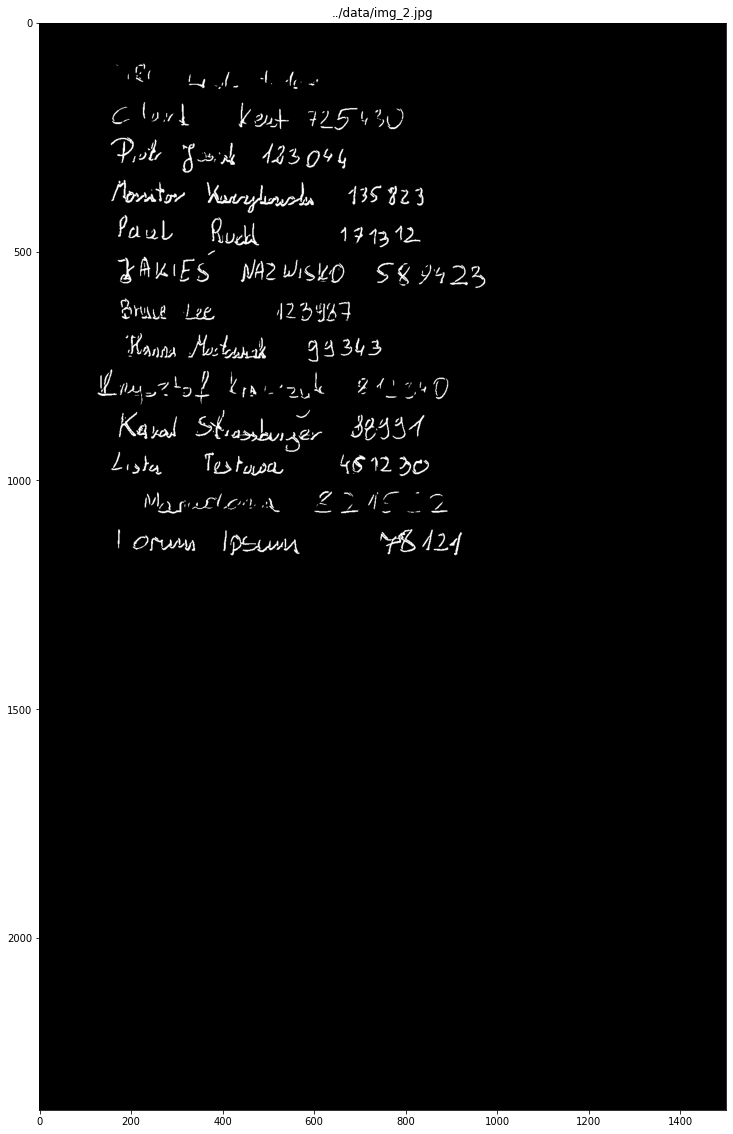

Took : 16.943s


In [3]:
from time import time

from matplotlib import pyplot as plt

from pipeline_grid_removal import straighten_page, remove_grid_lines

image_list = []
image_moments = []
for image, file_path in input_image_list:
    time_start = time()
    image_straightened, moments = straighten_page(image)
    image_no_grid = remove_grid_lines(image_straightened)

    plt.figure(figsize=(20, 20))
    plt.title(file_path)
    plt.imshow(image_no_grid, cmap='gray')
    plt.show()

    duration = time() - time_start
    duration = round(duration, 3)
    print(f'Took : {duration}s')

    image_list.append(image_no_grid)
    image_moments.append(moments)

Do something

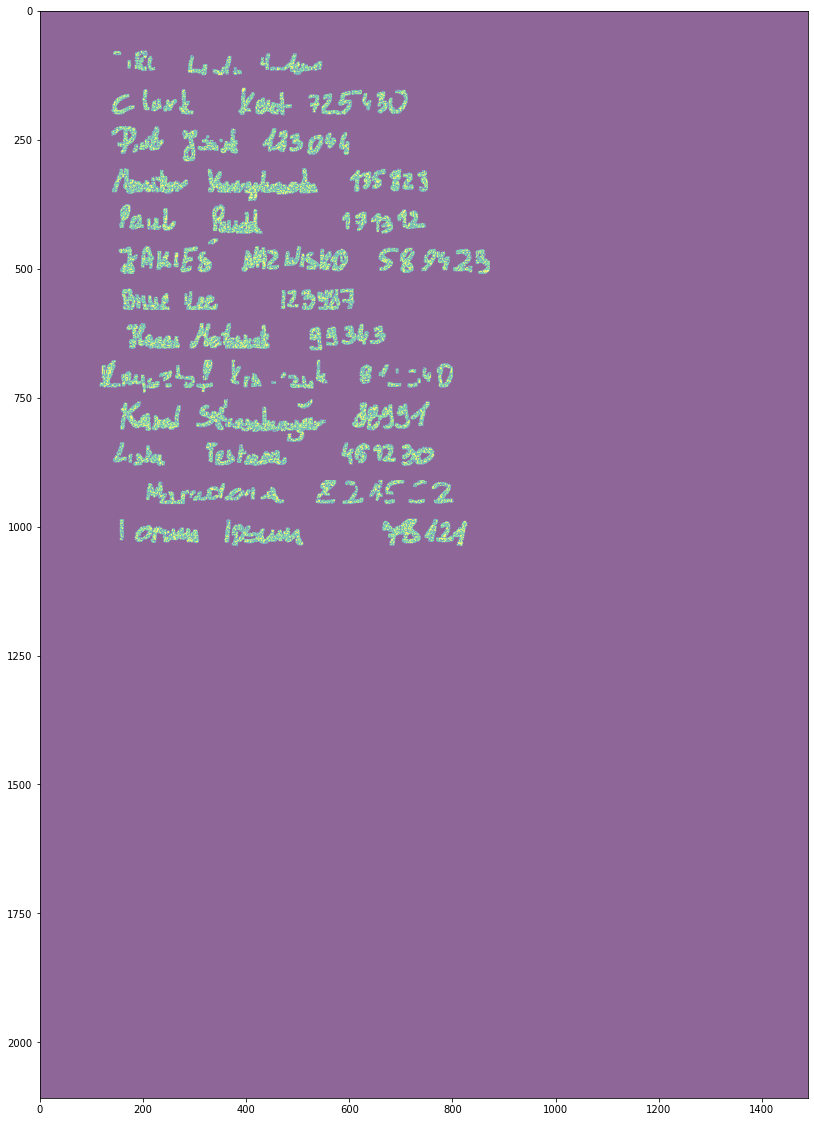

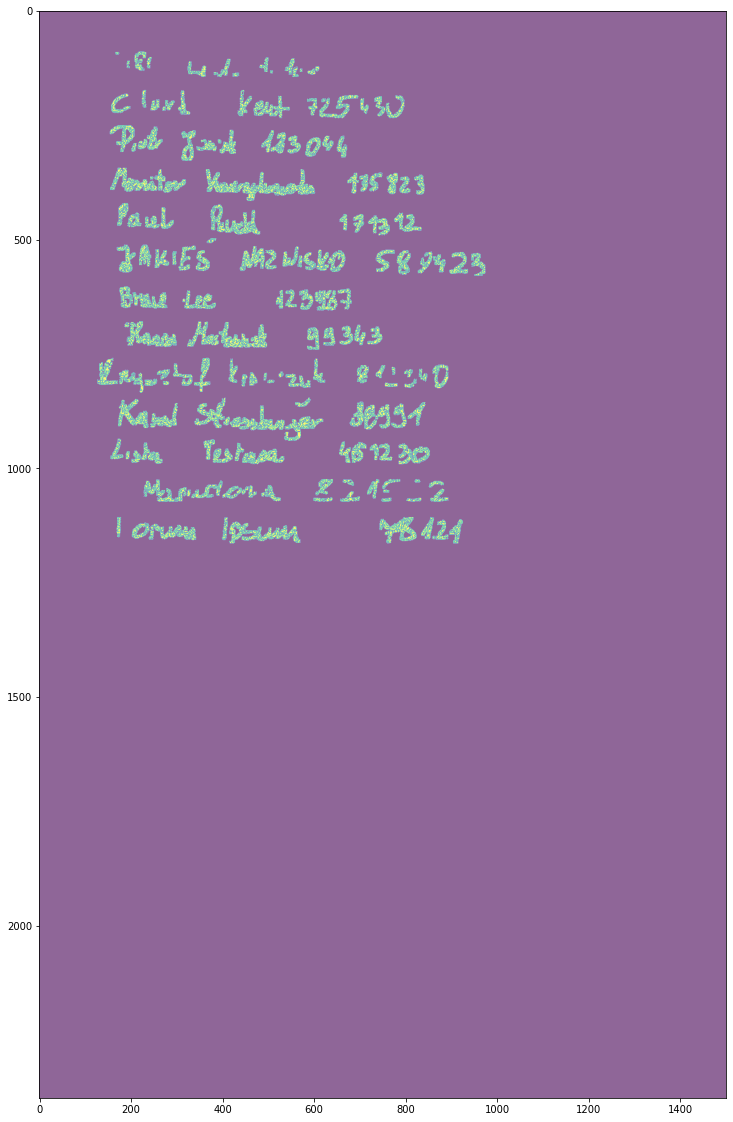

In [4]:
import numpy as np
from pipeline_word_detection import get_clusters

cluster_list = get_clusters(image_list)

for clusters in cluster_list:
    plt.figure(figsize=(20, 20))
    plt.imshow(clusters, alpha=0.6)
    plt.show()

Detect words and numbers

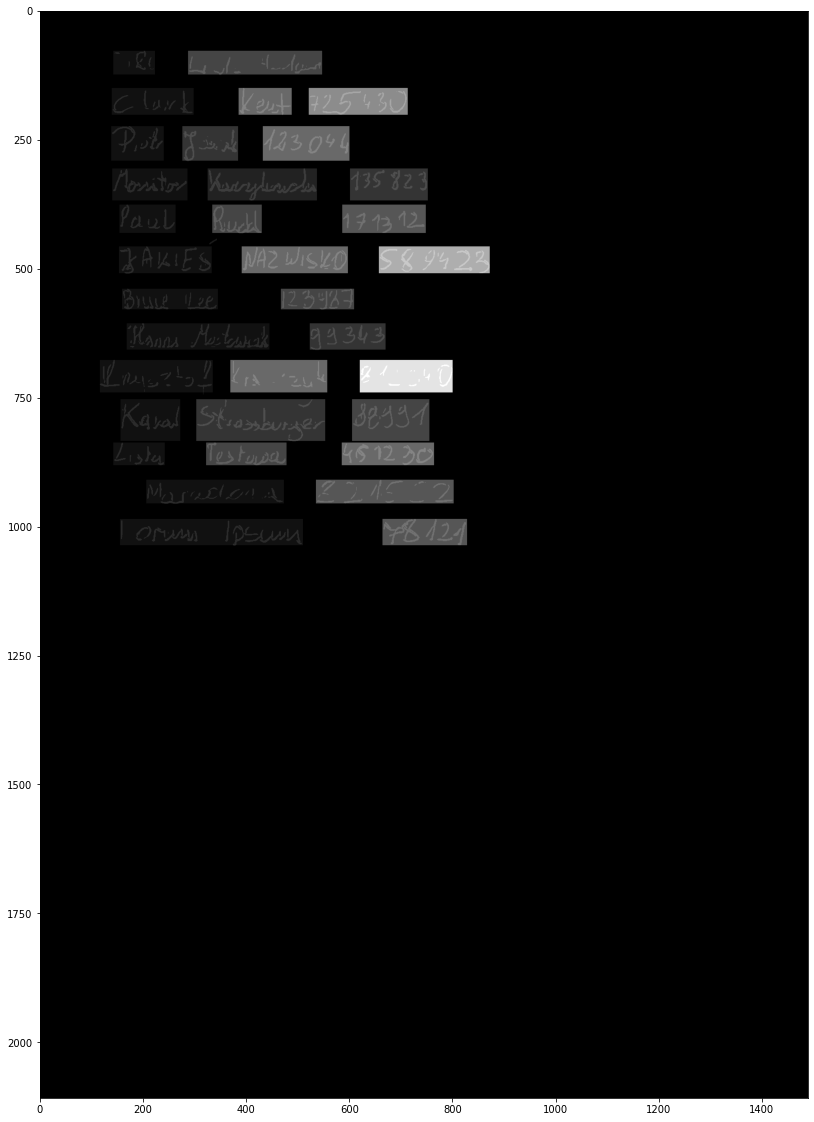

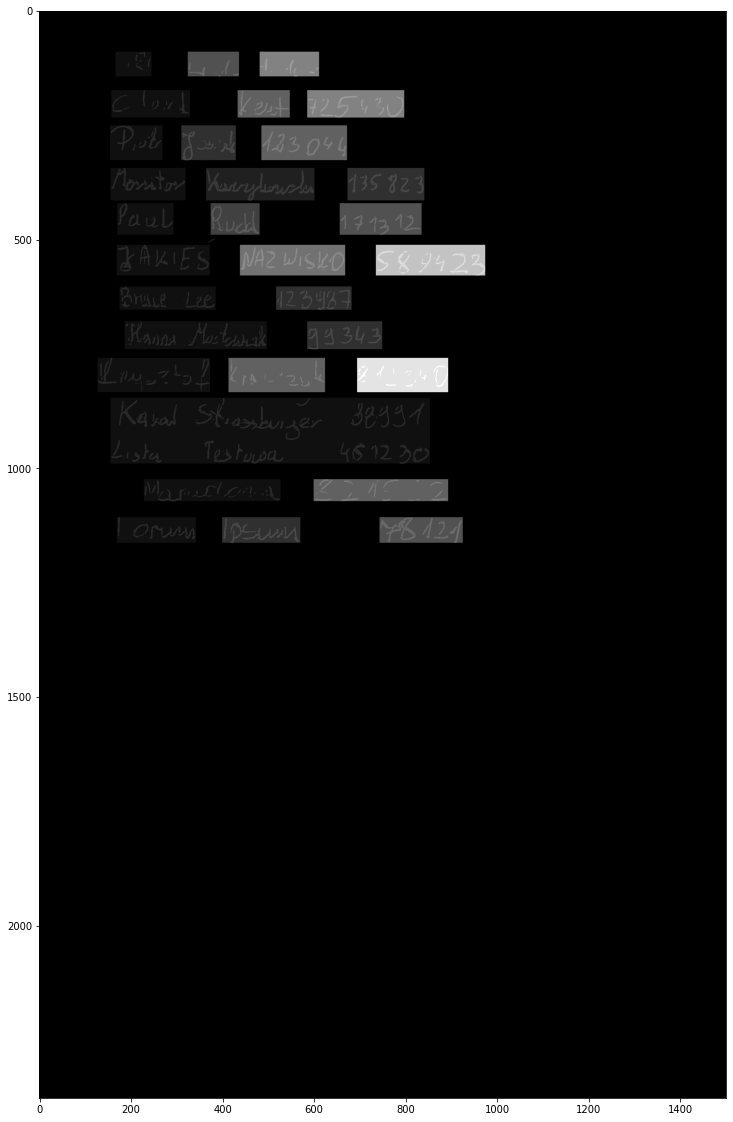

In [5]:
from pipeline_word_detection import get_segmentation_mask

segmentation_result_list = get_segmentation_mask(image_list, cluster_list)
for (image_no_grid, segmentation_result) in zip(image_list, segmentation_result_list):
    rows = segmentation_result.image

    plt.figure(figsize=(20, 20))

    plt.imshow(image_no_grid, cmap='gray')
    plt.imshow(rows, alpha=0.9, cmap='gray')
    plt.show()

Get row and word locations

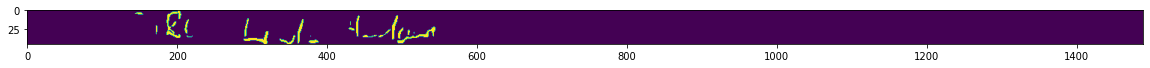

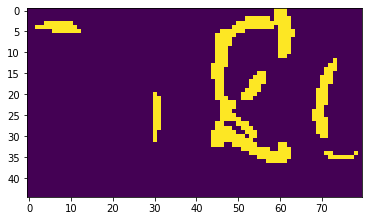

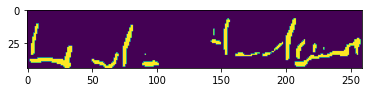

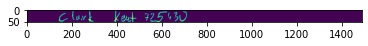

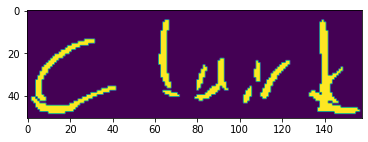

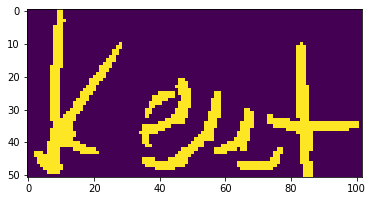

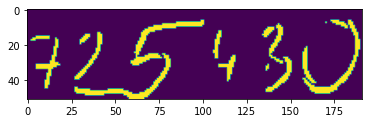

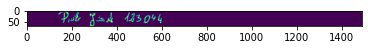

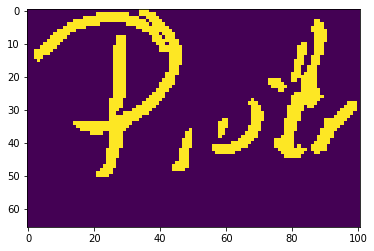

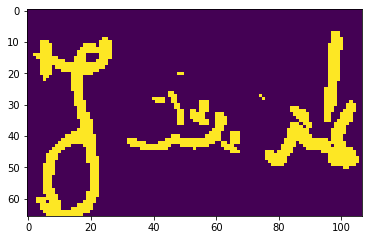

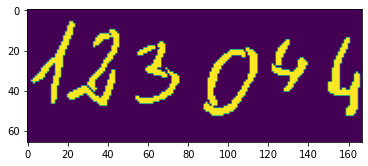

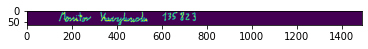

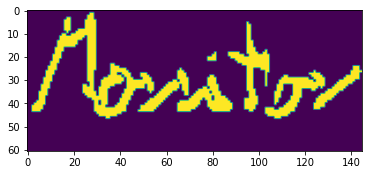

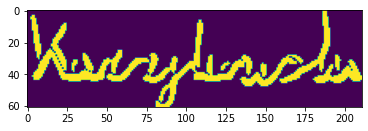

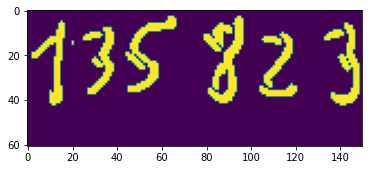

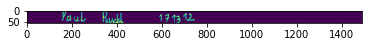

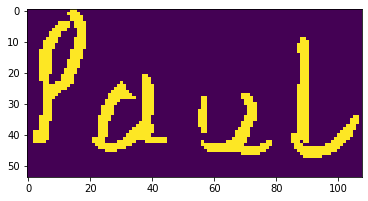

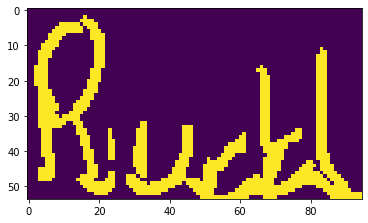

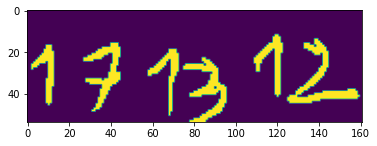

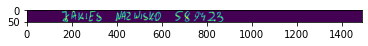

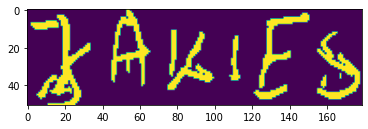

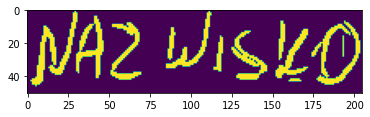

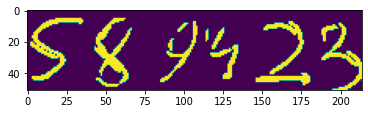

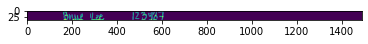

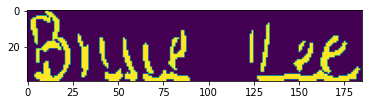

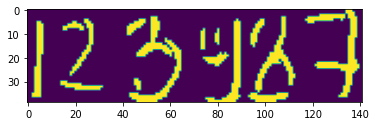

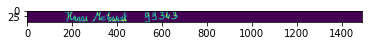

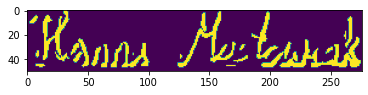

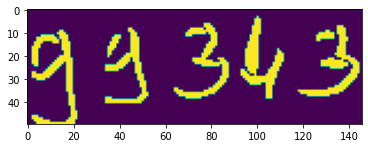

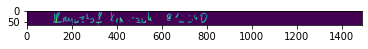

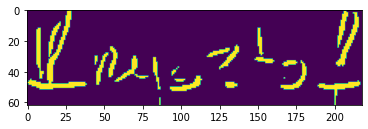

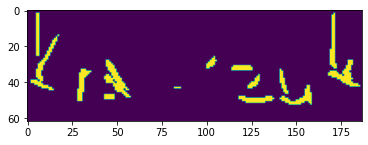

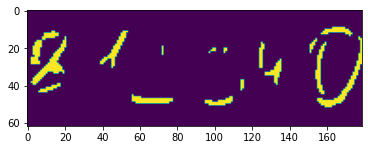

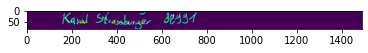

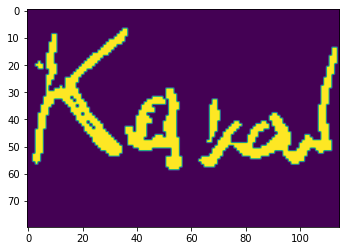

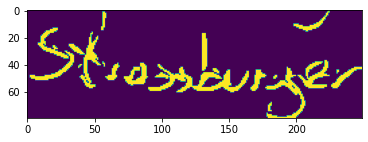

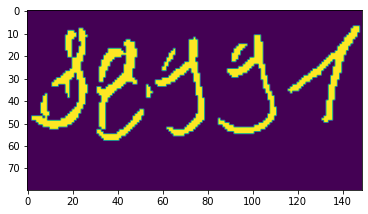

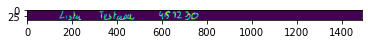

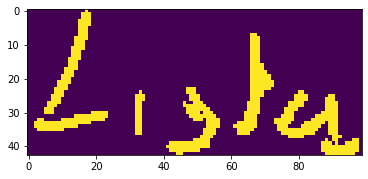

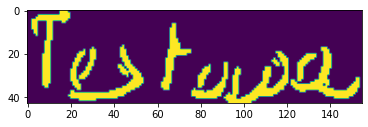

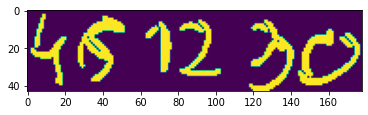

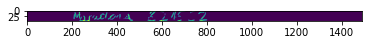

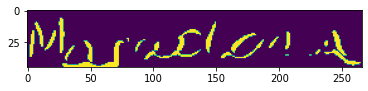

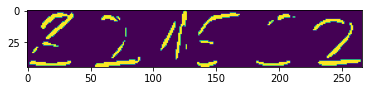

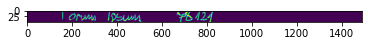

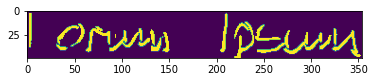

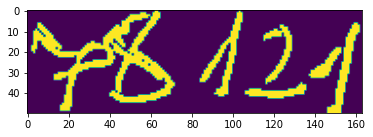

13 0


In [6]:
from pipeline_word_detection import get_row_descriptions

row_description_list = get_row_descriptions(image_list, segmentation_result_list)[0]

plt.figure(figsize=(20, 20))

for r in row_description_list:
    plt.imshow(r.data)
    plt.show()

    for w in r.words:
        plt.imshow(w.data)
        plt.show()

print(len(row_description_list), segmentation_result_list[0].background_cluster)


Reverse perspective transformation for mask

(array([[ 99,  97,  98, ..., 124, 130, 124],
       [101,  94,  96, ..., 125, 130, 126],
       [ 94,  94,  96, ..., 125, 129, 125],
       ...,
       [ 76,  75,  76, ...,  79,  81,  78],
       [ 76,  75,  75, ...,  78,  79,  79],
       [ 76,  74,  74, ...,  78,  79,  80]], dtype=uint8), '../data/img_1.jpg')


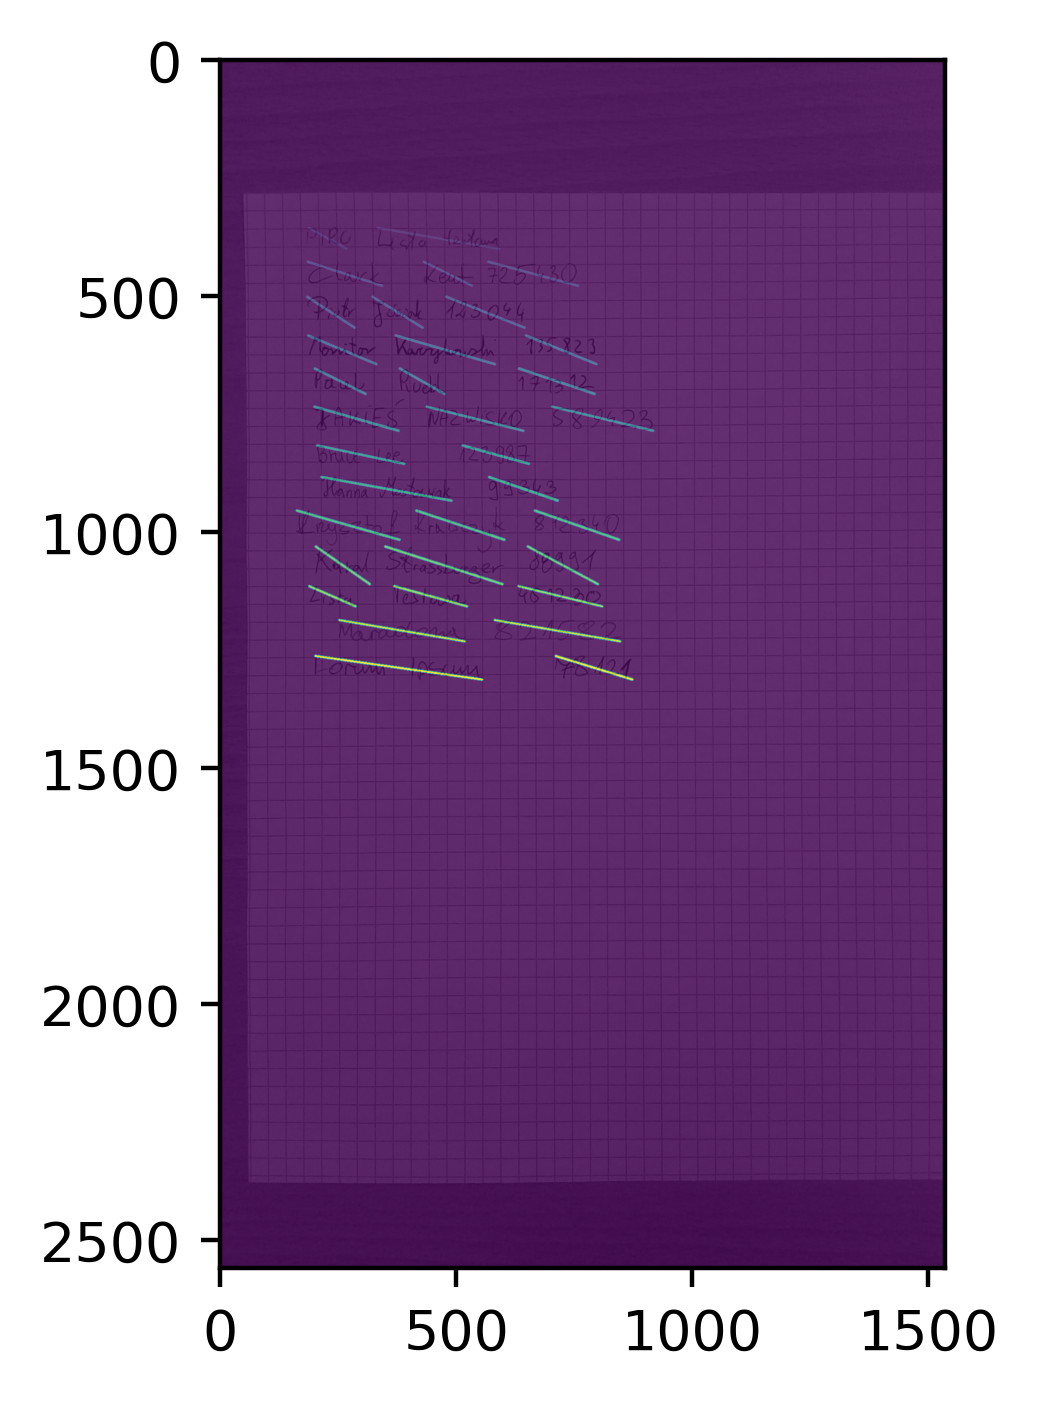

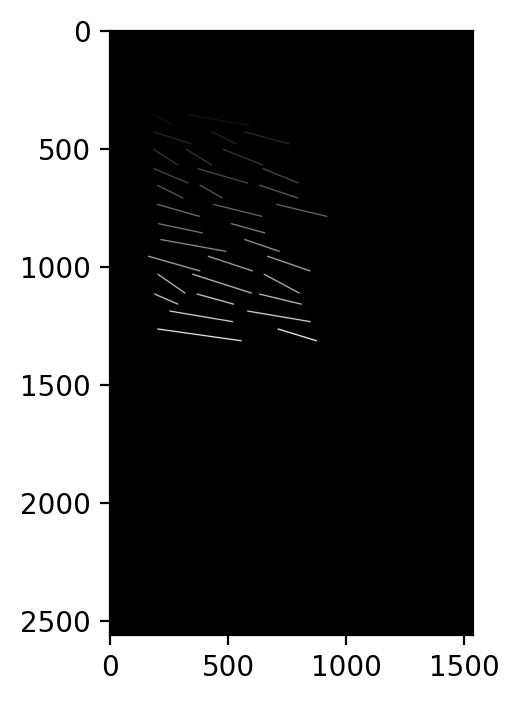

In [7]:
from pipeline_word_detection import create_mask

(input_image,) = input_image_list[0][0],
moments = image_moments[0]
print(input_image_list[0])

mask_shape = segmentation_result_list[0].image.shape
output_shape = (input_image.shape[1], input_image.shape[0])
warped_mask = create_mask(mask_shape, output_shape, row_description_list, moments)

plt.figure(dpi=400)
plt.imshow(input_image, cmap="gray")
plt.imshow(warped_mask, alpha=0.8)
plt.show()

plt.figure(dpi=200)
plt.imshow(warped_mask, cmap="gray")
plt.show()

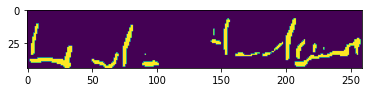

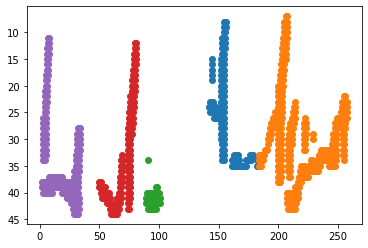

Groups count: 5
Min points in group: 47
Mean points in group: 198.4


d:\projects\put\computer-vision-project-2\venv\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: The Windows bytes API has been deprecated, use Unicode filenames instead


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\projects\\PUT\\Computer-Vision-Project-2\\main_notebooks/pickled_objects/dataset_mnist.pickle'

In [8]:
from src.pipeline_digit_recognition import segment_to_digits, digits_to_mnist_format, load_clf_and_dataset
from src.pipeline_digit_recognition import predict_digits  # Import has been split due to auto format issues

import os

for r in row_description_list:
    number = r.words[-1].data
    plt.imshow(number)
    plt.show()

    digits = segment_to_digits(number)

    #     for d in digits:
    #         plt.imshow(d)
    #         plt.show()

    digits_to_mnist_format(digits)

    #     for d in digits:
    #         plt.imshow(d)
    #         plt.show()

    workdir = os.getcwdb().decode("utf-8")
    clf_pickle_path = workdir + "/pickled_objects/clf_mnist.pickle"
    dataset_pickle_path = workdir + "/pickled_objects/dataset_mnist.pickle"

    clf, _ = load_clf_and_dataset(clf_pickle_path, dataset_pickle_path)

    predict_digits(clf, digits)
